1. Hi how are you?

2. Congratulations! You have won the lottery! Contact our customer representative to claim your reward for 10 crore! 

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# nltk.download()

In [3]:
df = pd.read_csv('SMSSpamCollection', sep="\t", names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
df['length'] = df['message'].apply(len)

In [9]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='length', ylabel='Count'>

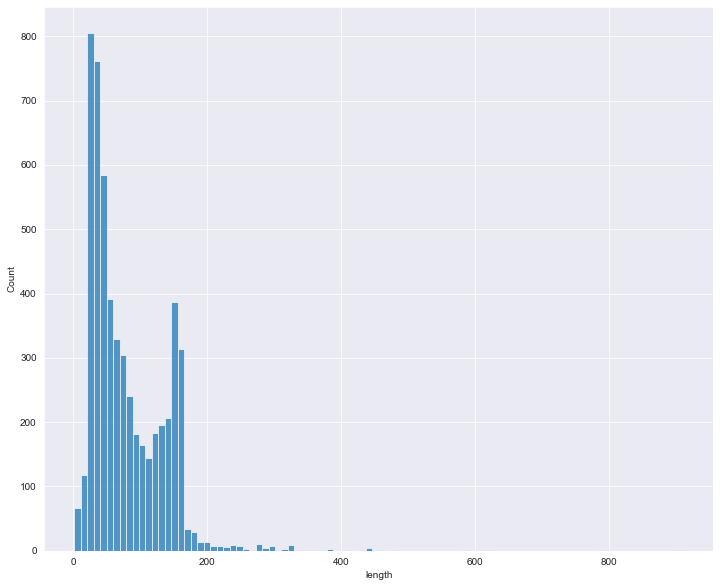

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 10))
sns.histplot(df['length'])

In [11]:
df['length'].max()

910

In [12]:
df['length'].min()

2

# Text Filtering

In [13]:
sampleMessage = "Hi! Good morning... How are you?"

In [14]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
noPunc = []

In [16]:
for c in sampleMessage:
    if c not in string.punctuation:
        noPunc.append(c)

In [17]:
noPunc

['H',
 'i',
 ' ',
 'G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'H',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u']

In [18]:
noPunc = ''.join(noPunc)
noPunc

'Hi Good morning How are you'

In [19]:
words = noPunc.split()
words

['Hi', 'Good', 'morning', 'How', 'are', 'you']

In [20]:
cleanMessage = []

In [21]:
for word in words:
    if word not in stopwords.words():
        cleanMessage.append(word)

In [22]:
cleanMessage

['Hi', 'Good', 'morning', 'How']

In [23]:
def textFiltering(message):
    noPunc = []
    for c in message:
        if c not in string.punctuation:
            noPunc.append(c)  
            
    noPunc = ''.join(noPunc)
    noPunc = noPunc.split()
    
    output = []
    
    for word in noPunc:
        if word not in stopwords.words():
            output.append(word)
            
    return output

In [24]:
textFiltering(sampleMessage)

['Hi', 'Good', 'morning', 'How']

In [25]:
textFiltering("yooooooo")

['yooooooo']

# Count Vectorization (Bag of Words)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
bow_transformer = CountVectorizer(analyzer=textFiltering).fit(df['message'])

In [28]:
bow_transformer

CountVectorizer(analyzer=<function textFiltering at 0x120880f70>)

In [29]:
bow_transformer.vocabulary_

{'Go': 2113,
 'jurong': 7681,
 'point': 8995,
 'crazy': 5941,
 'Available': 1133,
 'bugis': 5396,
 'great': 7083,
 'world': 11214,
 'buffet': 5395,
 'Cine': 1521,
 'got': 7052,
 'amore': 4840,
 'Ok': 3177,
 'lar': 7820,
 'Joking': 2535,
 'wif': 11125,
 'Free': 1993,
 'entry': 6481,
 '2': 423,
 'wkly': 11175,
 'comp': 5791,
 'win': 11136,
 'FA': 1882,
 'Cup': 1589,
 'final': 6705,
 'tkts': 10575,
 '21st': 443,
 'May': 2896,
 '2005': 430,
 'Text': 4095,
 '87121': 871,
 'receive': 9329,
 'questionstd': 9236,
 'txt': 10747,
 'rateTCs': 9277,
 'apply': 4918,
 '08452810075over18s': 73,
 'U': 4221,
 'dun': 6361,
 'say': 9630,
 'early': 6378,
 'hor': 7324,
 'already': 4817,
 'Nah': 3047,
 'I': 2362,
 'dont': 6282,
 'think': 10498,
 'goes': 7023,
 'usf': 10857,
 'lives': 7959,
 'around': 4963,
 'though': 10515,
 'FreeMsg': 1995,
 'Hey': 2290,
 'darling': 6033,
 '3': 543,
 'weeks': 11064,
 'word': 11201,
 'back': 5076,
 'Id': 2424,
 'like': 7917,
 'fun': 6903,
 'still': 10163,
 'Tb': 4072,
 'ok'

In [30]:
len(bow_transformer.vocabulary_)

11472

In [31]:
demoMessage = df['message'][3]
demoMessage

'U dun say so early hor... U c already then say...'

In [32]:
demoBow = bow_transformer.transform([demoMessage])
print(demoBow)

  (0, 4221)	2
  (0, 4817)	1
  (0, 6361)	1
  (0, 6378)	1
  (0, 7324)	1
  (0, 9630)	2


In [33]:
bow_transformer.vocabulary_['U']

4221

In [34]:
bow_transformer.vocabulary_['say']

9630

In [35]:
messagesBow = bow_transformer.transform(df['message'])

In [36]:
messagesBow.shape

(5572, 11472)

# TF - IDF

Term Frequency: number of times a term occurs in the df / total terms in the df

Inverse Document Frequency: log_e(total rows/rows with that term in it)

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

In [38]:
tfidfTransformer = TfidfTransformer().fit(messagesBow)

In [39]:
demoTfidf = tfidfTransformer.transform(demoBow)

In [41]:
print(demoBow)

  (0, 4221)	2
  (0, 4817)	1
  (0, 6361)	1
  (0, 6378)	1
  (0, 7324)	1
  (0, 9630)	2


In [40]:
print(demoTfidf)

  (0, 9630)	0.5640673550325177
  (0, 7324)	0.45972329929679995
  (0, 6378)	0.33381540325145387
  (0, 6361)	0.31372322843166084
  (0, 4817)	0.2788043677671387
  (0, 4221)	0.42766300293424464


In [44]:
messagesTfidf = tfidfTransformer.transform(messagesBow)

In [45]:
messagesTfidf.shape

(5572, 11472)

# Classification

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
model = MultinomialNB().fit(messagesTfidf, df['label'])

In [48]:
model.predict(demoTfidf)

array(['ham'], dtype='<U4')

In [49]:
predictions = model.predict(messagesTfidf)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(df['label'], predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.95      5572
weighted avg       0.98      0.98      0.98      5572



# Pipeline

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
pipe = Pipeline([
    ('bow', CountVectorizer(analyzer=textFiltering)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [54]:
pipe.fit(df['message'], df['label'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textFiltering at 0x120880f70>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])